dp=105022541890.25569


<IPython.core.display.Javascript object>


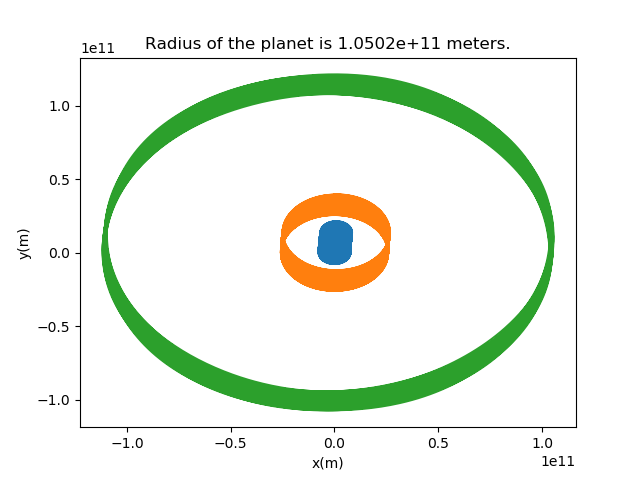

In [6]:
# HOMEWORK 8 
# Carlos Perez
#================================
import numpy as np
import matplotlib.pyplot as plt
#================================
%matplotlib notebook
#================================
# For this homework I decided to integrate the system for 25 years. As well, 
# for the graphs I manually changed the radius (pp) of the planet to find what 
# was asked of me and uploaded the graphs accordingly.
#================================
# gravitational acceleration due to M
def agravit(M,rm,rM): #rm, rM are 2d numpy arrays, returns acceleration by M on m
    G=6.67408e-11
    r=rM-rm
    R=np.sqrt((r**2).sum()) #length
    return G*M/R**3*r # 2d numpy array of F

# gravitational acceleration due to M1 and M2
def agravit2(M1,M2,rm,rM1,rM2):
    return agravit(M1,rm,rM1)+agravit(M2,rm,rM2)
#-----------------------------------------
# runge-kutta 1 step, use rnow & tnow to output rnext & tnext(==tnow+h)
def rk1step(f,rnow,tnow,h):
    k1=h*f(rnow,tnow)
    k2=h*f(rnow+k1/2,tnow+h/2)
    k3=h*f(rnow+k2/2,tnow+h/2)
    k4=h*f(rnow+k3,tnow+h)
    rnext=rnow+(k1+2*k2+2*k3+k4)/6
    return tnow+h,rnext
#-----------------------------------------
# adaptive h
def updateh(f,rnow,tnow,h,error=1e-3):
    _,r1=rk1step(f,rnow,tnow,h)
    _,r2=rk1step(f,rnow,tnow,2*h)
    rho=30*h*error/np.sqrt(((r1-r2)**2).sum()) #displacement difference |x1-x2|
    return h*rho**(1/4)
#-----------------------------------------
# runge-kutta with optional adaptive time step
def rk2d(f,r0,t0,t1,h0,error=1e-3,adaptive=True):
    t=np.array([t0])
    r=np.array([r0])
    while t[-1]<t1:
        if adaptive:
            h=updateh(f,r[-1],t[-1],h0,error=error)
        tnext,rnext=rk1step(f,r[-1],t[-1],h)
        t=np.append(t,tnext)
        r=np.append(r,np.array([rnext]),axis=0)
    return t,r
#================================
# actual problem
# three body problem
G=6.67408e-11
m_sun=1.989e30
m_jupiter=1.898e27
m1=0.68*m_sun
m2=0.2*m_sun
mp=0.33*m_jupiter
p12=41*24*3600
pp=229*24*3600 # period of the planet is used to move planet closer to the stars

# 1st graph pp = 229*24*3600
# 2nd graph pp = 162*24*3600, stable orbit
# 3rd graph pp = 161*24*3600, unstable orbit

u=m1+m2
d=((p12/np.pi/2)**2*G*u)**(1/3)
d1=d/0.88*0.2
d2=d/0.88*0.68
dp=((pp/np.pi/2)**2*G*u)**(1/3)
# print distance from the center of mass to the planet
print('dp=%s'%dp)

#-----------------------
#4d time derivative
def F(R,t): # R=(r1,r2,rp,v1,v2,vp)
    #r1=R[0:2]
    #r2=R[2:4]
    #r3=R[4:6]
    #v1=R[6:8]
    #v2=R[8:10]
    #v3=R[10:]
    # returns (v1,v2,vp,a1,a2,ap)
    return np.concatenate( ( R[6:],agravit2(m2,mp,R[0:2],R[2:4],R[4:6]),agravit2(m1,mp,R[2:4],R[0:2],R[4:6]),agravit2(m1,m2,R[4:6],R[0:2],R[6:8]) ) )
#-----------------------
#================================
# adjustable variables
t0=0 # initial time
t1=25*365.25*24*3600 # simulation stop time (25 yrs.)
h=12*48*3600 # initial time step
error=1e-3 # error level for adaptive time step
#----------------------------------------------
# initial positions
r10=np.array([d1,0])
r20=np.array([-d2,0])
rp0=np.array([dp,0])
# initial velocity of the suns and the planet, assumed circular trajectory, constant speed, orbiting counter-clockwise
v10=np.array([0,2*np.pi*d1/p12])
v20=np.array([0,-2*np.pi*d2/p12])
vp0=np.array([0,2*np.pi*dp/pp]) # a=v^2/r => v=sqrt(a*r)
R0=np.concatenate( (r10,r20,rp0,v10,v20,vp0) ) # initial 12d vector
#-----------------------------------------------
t,R=rk2d(F,R0,t0,t1,h,error=error,adaptive=True)
#-----------------------------------------------
x1=np.array([])
y1=np.array([])
vx1=np.array([])
vy1=np.array([])

x2=np.array([])
y2=np.array([])
vx2=np.array([])
vy2=np.array([])

xp=np.array([])
yp=np.array([])
vxp=np.array([])
vyp=np.array([])
for i in range(len(R)):
    x1=np.append(x1,R[i][0])
    y1=np.append(y1,R[i][1])
    vx1=np.append(vx1,R[i][6])
    vy1=np.append(vy1,R[i][7])
    
    x2=np.append(x2,R[i][2])
    y2=np.append(y2,R[i][3])
    vx2=np.append(vx2,R[i][8])
    vy2=np.append(vy2,R[i][9])
    
    xp=np.append(xp,R[i][4])
    yp=np.append(yp,R[i][5])
    vxp=np.append(vxp,R[i][10])
    vyp=np.append(vyp,R[i][11])
#================================
# plot
fig,ax=plt.subplots(1,1)
plt.plot(x1,y1,x2,y2,xp,yp)
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_title('Radius of the planet is %.4e meters.'%dp)
plt.show()